# Get different sentiment algorithms and compare them

In [1]:
import os
import sys
import dotenv
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [2]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from client.query_api_client import HelixirQueryApi

## Create api client

In [3]:
dotenv.load_dotenv(".env")
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = HelixirQueryApi(auth_token=AUTH_TOKEN, api_version="v1")
client

In [4]:
sent1_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '10' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent1 = client.get_data_response(sent1_query)
sent1['time'] = pd.to_datetime(sent1['time'])
sent1.set_index('time')
sent1['sentiment'] = pd.to_numeric(sent1['sentiment'])
sent1['ewm'] = sent1['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent1

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,0.080000,2023-02-20 10:00:00+00:00,0.080000
1,0.051600,2023-02-20 11:00:00+00:00,0.074836
2,0.438175,2023-02-20 12:00:00+00:00,0.140898
3,0.464425,2023-02-20 13:00:00+00:00,0.199721
4,0.314667,2023-02-20 14:00:00+00:00,0.220620
...,...,...,...
193,-0.200600,2023-03-02 04:00:00+00:00,0.231746
194,0.273200,2023-03-02 05:00:00+00:00,0.239283
195,0.132900,2023-03-02 06:00:00+00:00,0.219941
196,-0.037950,2023-03-02 07:00:00+00:00,0.173051


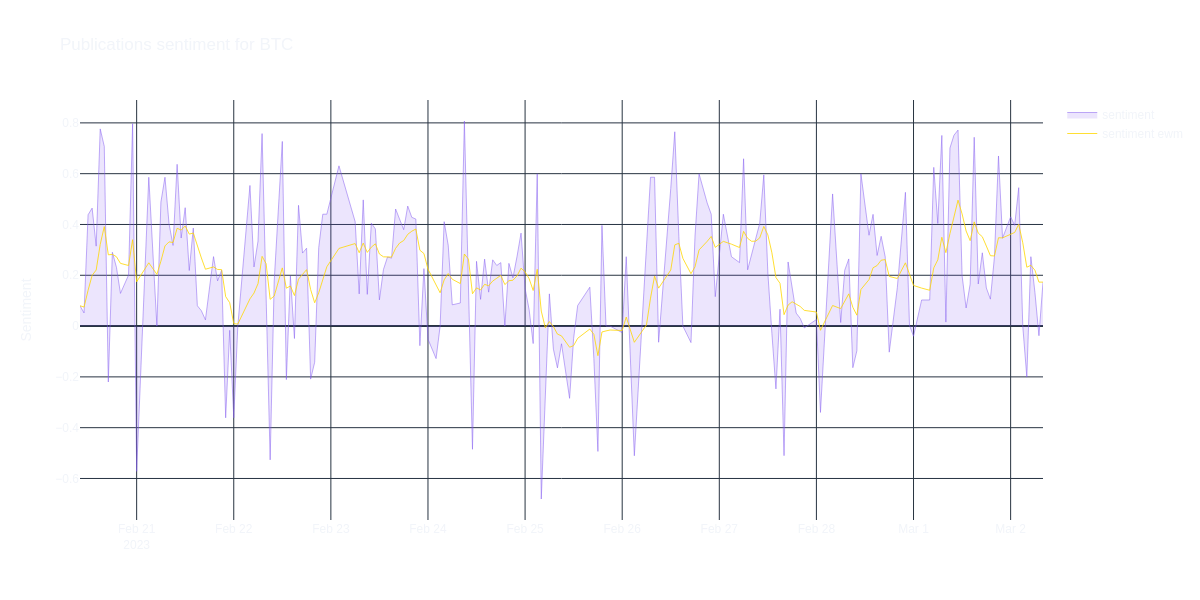

In [5]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent1['time'],
                         y=sent1['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent1['time'],
                         y=sent1['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [6]:
sent2_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion_2) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '10' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent2 = client.get_data_response(sent2_query)
sent2['time'] = pd.to_datetime(sent2['time'])
sent2.set_index('time')
sent2['sentiment'] = pd.to_numeric(sent2['sentiment'])
sent2['ewm'] = sent2['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent2

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,0.170860,2023-02-20 10:00:00+00:00,0.170860
1,0.000000,2023-02-20 11:00:00+00:00,0.139795
2,0.000000,2023-02-20 12:00:00+00:00,0.114377
3,0.174655,2023-02-20 13:00:00+00:00,0.125337
4,-0.238917,2023-02-20 14:00:00+00:00,0.059109
...,...,...,...
193,0.000000,2023-03-02 04:00:00+00:00,0.073259
194,0.000000,2023-03-02 05:00:00+00:00,0.059939
195,0.027479,2023-03-02 06:00:00+00:00,0.054037
196,0.383152,2023-03-02 07:00:00+00:00,0.113876


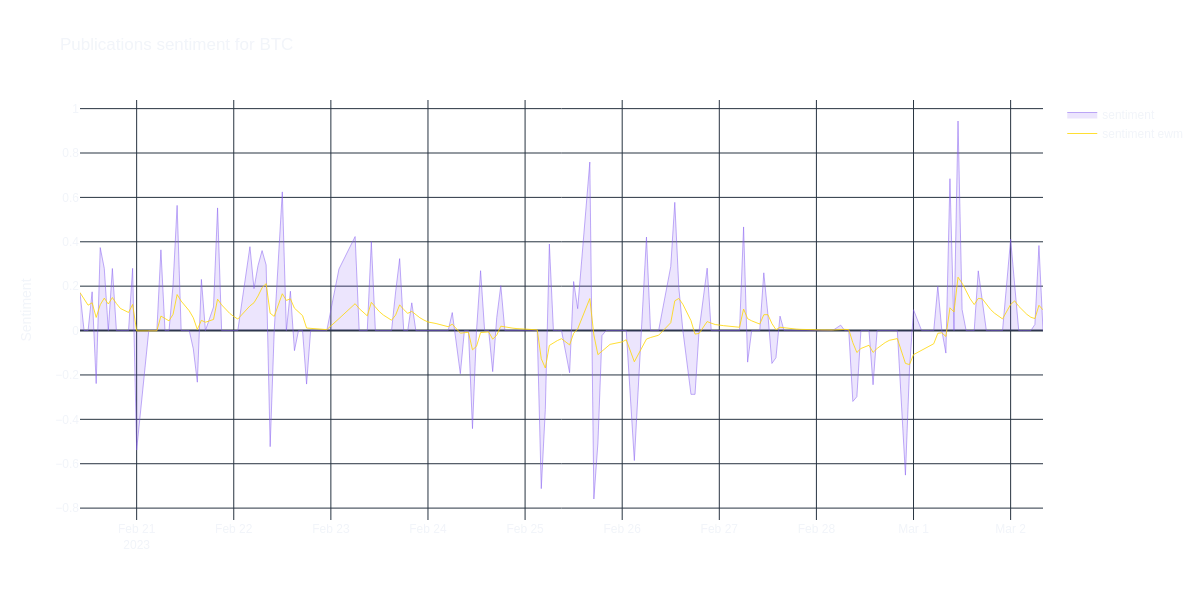

In [7]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent2['time'],
                         y=sent2['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent2['time'],
                         y=sent2['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [8]:
sent3_query = """SELECT date_trunc('hour', created_at) as time, avg(emotion_3) as sentiment
FROM pubs.articles.docs
where created_at >= now() - interval '10' day
  and contains(tags, 'btc')
group by 1
order by 1;"""

sent3 = client.get_data_response(sent3_query)
sent3['time'] = pd.to_datetime(sent3['time'])
sent3.set_index('time')
sent3['sentiment'] = pd.to_numeric(sent3['sentiment'])
sent3['ewm'] = sent3['sentiment'].ewm(span=10,min_periods=0,adjust=False,ignore_na=False).mean()
sent3

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,sentiment,time,ewm
0,0.332894,2023-02-20 10:00:00+00:00,0.332894
1,0.000000,2023-02-20 11:00:00+00:00,0.272368
2,0.125053,2023-02-20 12:00:00+00:00,0.245583
3,0.249993,2023-02-20 13:00:00+00:00,0.246385
4,0.333333,2023-02-20 14:00:00+00:00,0.262194
...,...,...,...
193,-0.907243,2023-03-02 04:00:00+00:00,-0.026408
194,0.998504,2023-03-02 05:00:00+00:00,0.159940
195,0.143343,2023-03-02 06:00:00+00:00,0.156922
196,0.499994,2023-03-02 07:00:00+00:00,0.219299


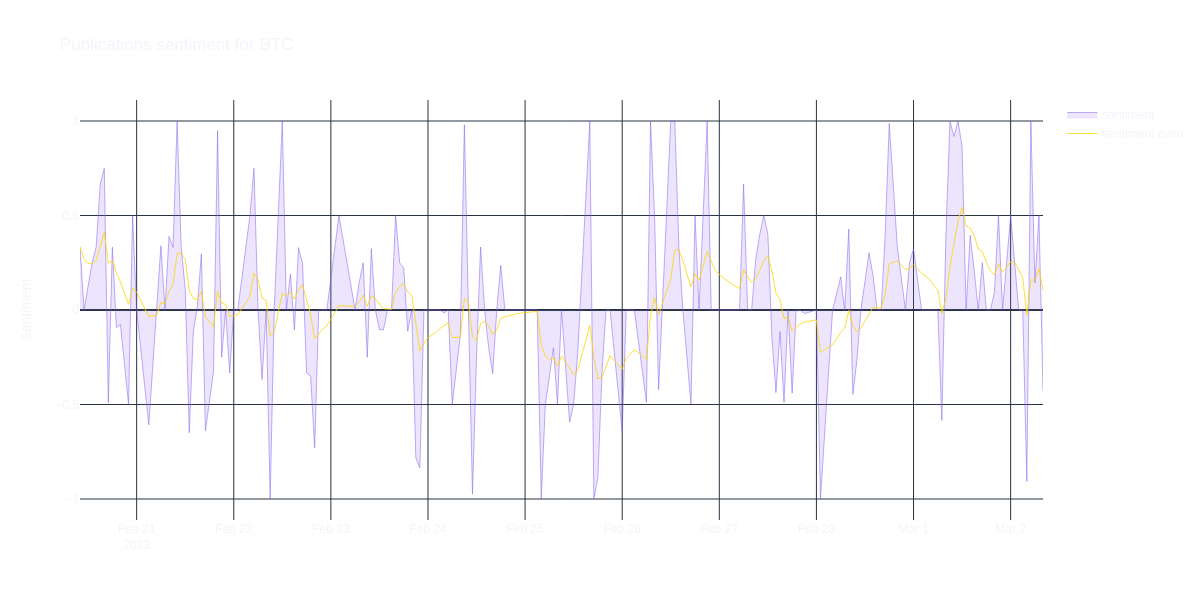

In [9]:
fig = make_subplots()

tg_sentiment = go.Scatter(x=sent3['time'],
                         y=sent3['sentiment'],
                         name="sentiment",
                         mode='lines',
                         line=dict(width=0.5, color='rgb(131, 90, 241)'),
                         fill='tozeroy',
                         fillcolor='rgba(131, 90, 241, 0.15)'
                         )
tg_sentiment_ewm = go.Scatter(x=sent3['time'],
                         y=sent3['ewm'],
                         name="sentiment ewm",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

fig.add_trace(tg_sentiment)
fig.add_trace(tg_sentiment_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

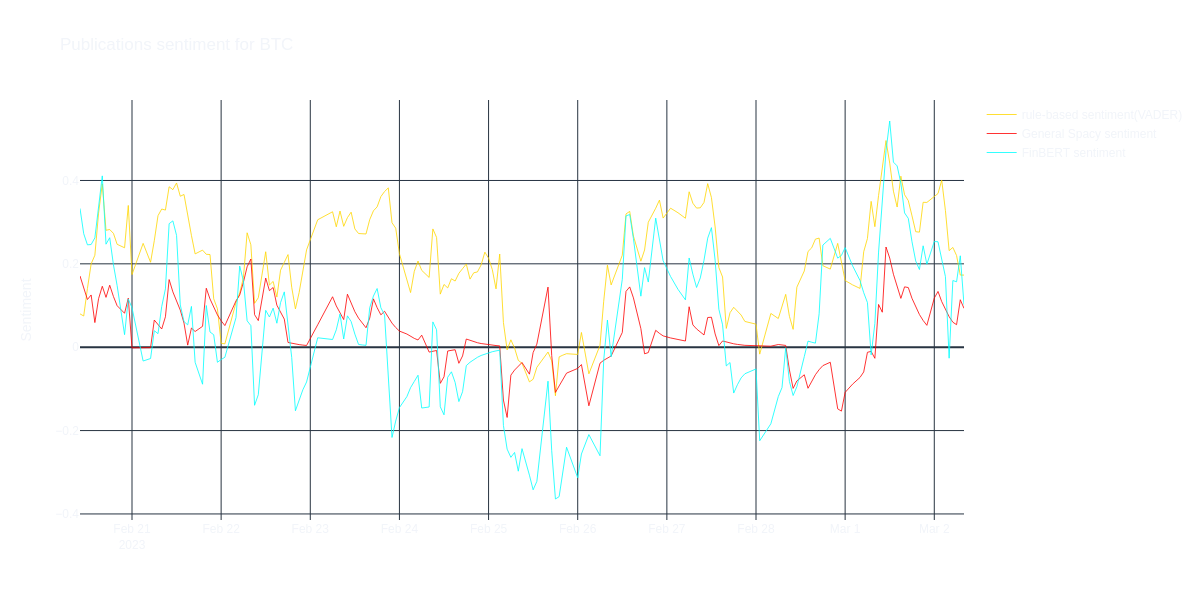

In [10]:
fig = make_subplots()

sentiment1_ewm = go.Scatter(x=sent1['time'],
                         y=sent1['ewm'],
                         name="rule-based sentiment(VADER)",
                         mode='lines',
                         line=dict(width=0.8, color='gold')
                         )

sentiment2_ewm = go.Scatter(x=sent2['time'],
                         y=sent2['ewm'],
                         name="General Spacy sentiment",
                         mode='lines',
                         line=dict(width=0.8, color='red')
                         )

sentiment3_ewm = go.Scatter(x=sent3['time'],
                         y=sent3['ewm'],
                         name="FinBERT sentiment",
                         mode='lines',
                         line=dict(width=0.8, color='cyan')
                         )

fig.add_trace(sentiment1_ewm)
fig.add_trace(sentiment2_ewm)
fig.add_trace(sentiment3_ewm)

fig.update_layout(
    width=1200, height=600,
    title="Publications sentiment for BTC",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment")

fig.show("png")

In [11]:
tohlcv_query = """SELECT p.bucket as time, open_stable, high_stable, low_stable, close_stable, v.volume
FROM series.chain_bsc.price_ticks_hourly p
         join series.chain_bsc.volume_ticks_hourly v
              on (p.bucket = v.bucket and p.token_id = v.token_id and p.platform_id = v.platform_id)
WHERE p.token_id = 204
  and p.platform_id = 1
  and p.bucket >= now() - interval '10' day
ORDER BY time;"""

tohlcv_resp = client.get_data_response(tohlcv_query)
tohlcv_resp['time'] = pd.to_datetime(tohlcv_resp['time'])
tohlcv_resp.set_index('time')
tohlcv_resp

Waiting for response till limit:   0%|          | 0/600 [00:00<?, ?it/s]

,close_stable,high_stable,low_stable,open_stable,time,volume
0,24862.686579115812,24910.26279279952,24794.773864587736,24884.614053881585,2023-02-20 11:00:00+00:00,9.9644653302423857
1,24825.604372487574,24898.021735049842,24825.604372487574,24867.75061189082,2023-02-20 12:00:00+00:00,6.4681383570715956
2,24823.48713022885,24847.088447693757,24804.147919453815,24825.307713435635,2023-02-20 13:00:00+00:00,5.1491507222143736
3,24899.773380282437,24986.31318006155,24806.644713477304,24817.984139877593,2023-02-20 14:00:00+00:00,19.5321488018791908
4,24962.889041843828,25002.25323937001,24900.90400163041,24900.90400163041,2023-02-20 15:00:00+00:00,11.2487953451327129
...,...,...,...,...,...,...
219,23490.912133575042,23584.661832193273,23486.470019151606,23516.053368853714,2023-03-02 05:00:00+00:00,1.0737107488735158
220,23449.131885292347,23483.491200322605,23448.038822599297,23482.16810948792,2023-03-02 06:00:00+00:00,1.2864885909654568
221,23408.785519761914,23493.862914798185,23402.66290677513,23481.472611282923,2023-03-02 07:00:00+00:00,2.1736042069868663
222,23385.2552864043,23409.077843729377,23364.99635827155,23409.077843729377,2023-03-02 08:00:00+00:00,4.5816852175160133


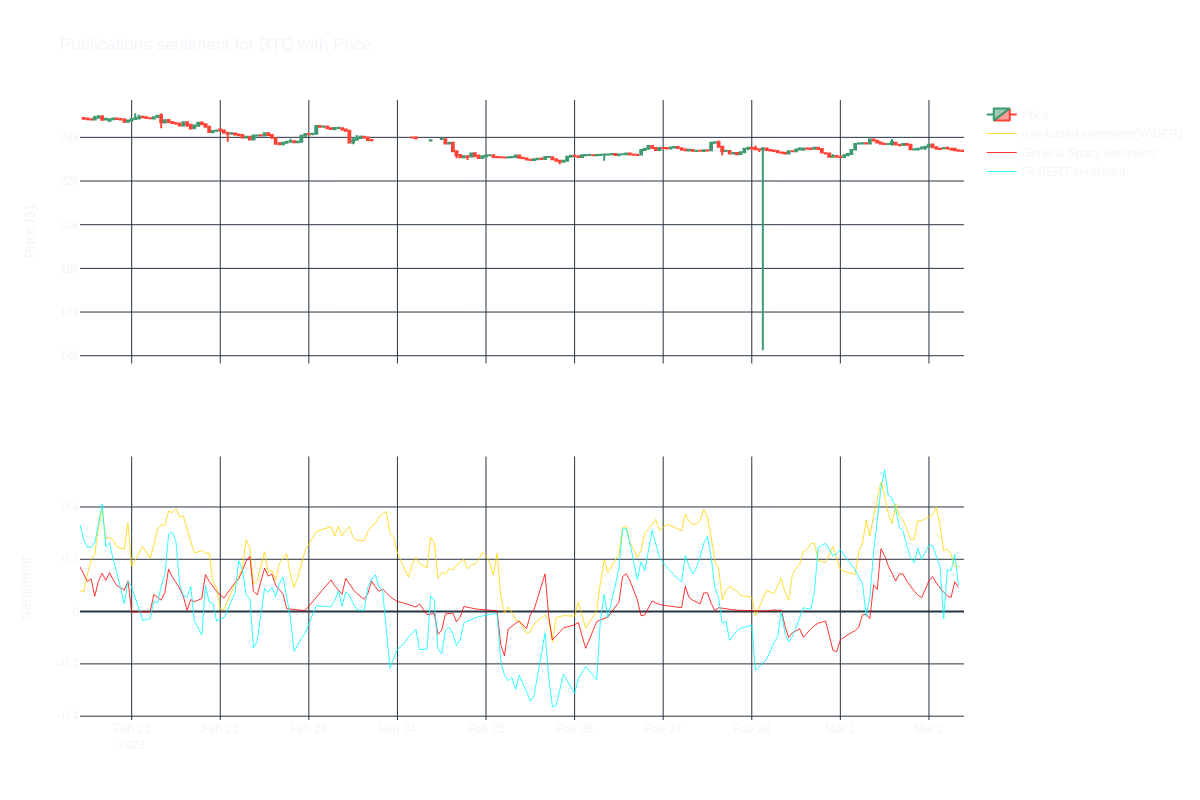

In [12]:
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

candlestick = go.Candlestick(
    x=tohlcv_resp['time'],
    open=tohlcv_resp['open_stable'],
    high=tohlcv_resp['high_stable'],
    low=tohlcv_resp['low_stable'],
    close=tohlcv_resp['close_stable'],
    name="Price"
)

fig.add_trace(candlestick, row=1, col=1)
fig.add_trace(sentiment1_ewm, row=2, col=1)
fig.add_trace(sentiment2_ewm, row=2, col=1)
fig.add_trace(sentiment3_ewm, row=2, col=1)

fig.update_layout(
    width=1200, height=800,
    title="Publications sentiment for BTC with Price",
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    xaxis_rangeslider_visible=False
)

# Set y-axes titles
fig.update_yaxes(title_text="Sentiment", row=2, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)

fig.show("png"  )